In [1]:
# Import dependencies
import pandas as pd
import re
import numpy as np
from sqlalchemy import create_engine
import psycopg2
from config import db_password
import time
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_path = ('.\Resources\marketing_data.csv')
market_df = pd.read_csv(file_path)
market_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
#Remove space from the column name Income
market_df.columns = market_df.columns.str.replace(" ","")
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
#convert $ salary data to float
market_df[market_df.columns[4]] = market_df[market_df.columns[4]].replace('[\$,]', '', regex=True).astype(float)
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [6]:
# Covert date to datetime
market_df["Dt_Customer"] = pd.to_datetime(market_df["Dt_Customer"])
# Check the columns' datatypes after converting
market_df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [7]:
# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
# Drop the rows where 'marital_status' is 'Absurd' or 'YOLO'
market_df = market_df.loc[(market_df["Marital_Status"] != 'Absurd') & (market_df["Marital_Status"] != 'YOLO')]

# Change 'ALone' to 'Single'
market_df['Marital_Status'].replace("Alone","Single", inplace=True)

# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [9]:
# Sort DOB in ascending order
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1298,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,...,12,6,1,0,1,0,0,1,1,SP
964,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,8,2,0,0,0,0,0,0,0,IND
1824,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,...,2,5,1,0,0,0,0,0,0,SP


In [10]:
# Drop the columns where the birth year is inconsistant
market_df = market_df.loc[(market_df["Year_Birth"] > 1900)]
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
1350,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,13,6,0,0,0,0,0,0,0,SP
1209,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,SA
1208,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1467,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,US
1468,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,SP
562,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,3,9,0,0,0,0,0,1,0,AUS


In [11]:
# Find the columns that has null values
for column in market_df.columns:
    print(f"Column {column} has {market_df[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column Income has 24 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has 0

In [12]:
# We are replacing the null values in income with mean income
market_df["Income"] = market_df["Income"].fillna(market_df["Income"].mean())

In [13]:
# Check for duplicate rows
df2 = pd.DataFrame(market_df,
                  columns = ['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'])
duplicate = df2[df2.duplicated()]
  
print("Duplicate Rows :")
duplicate 

Duplicate Rows :


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
27,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,...,8,8,0,0,0,0,0,0,0,SP
157,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,...,4,7,0,0,0,0,0,0,0,SP
181,1955,Graduation,Together,42586.0,1,1,2012-10-29,7,194,2,...,6,8,0,0,0,0,0,1,0,SP
204,1971,Graduation,Together,34600.0,1,1,2013-01-01,8,199,33,...,5,8,0,0,0,0,0,1,0,SP
314,1970,2n Cycle,Married,62466.0,0,1,2014-01-15,13,129,129,...,12,4,0,0,0,0,0,0,0,SP
332,1989,Graduation,Single,30279.0,1,0,2012-12-30,13,10,4,...,3,8,0,0,0,0,0,0,0,SP
363,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,...,4,6,0,0,0,0,0,0,0,SP
369,1974,PhD,Divorced,25509.0,1,0,2012-09-18,15,40,3,...,3,9,0,0,0,0,0,1,0,SP
479,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,0,...,4,4,0,0,0,0,0,0,0,SP
518,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,...,9,1,0,1,0,0,0,0,0,SP


In [14]:
# Drop the duplicate rows
market_df = market_df.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'], keep='last')
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [15]:
# Sort income in ascending order
market_df.sort_values(by='Income',ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,1,0,0,0,0,0,0,0,SP
663,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,19,0,0,0,0,0,0,0,SP
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,14,0,0,0,0,0,0,0,IND
961,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,1,0,0,0,0,0,0,0,US


In [16]:
# Remove the outlier in income
market_df = market_df.loc[(market_df["Income"] < 200000)]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [17]:
# Check the counts for country
market_df.Country.value_counts()

SP     1054
SA      333
CA      263
AUS     158
IND     145
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [18]:
# Remove the country Montenegro as it has only 3 values
market_df = market_df.loc[(market_df["Country"] != 'ME')]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [19]:
sum_amounts = market_df["MntWines"] + market_df["MntFruits"] +  market_df["MntMeatProducts"]+ market_df["MntFishProducts"]+ market_df["MntSweetProducts"]+ market_df["MntGoldProds"]
market_df["mnt_sum"] = sum_amounts
market_df

C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,mnt_sum
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,309
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,1383


In [20]:

PurchasesSum_column = market_df["NumDealsPurchases"] + market_df["NumWebPurchases"] +  market_df["NumCatalogPurchases"]+ market_df["NumStorePurchases"]

market_df["purchases_sum"] = PurchasesSum_column
market_df

C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,mnt_sum,purchases_sum
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,689,20
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,55,5
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,0,SP,309,14
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,0,IND,1383,20


In [21]:
file_path = ('.\Resources\country_data.csv')
country_df = pd.read_csv(file_path)
country_df

,Country,Lat,Long,Per Capita Income,Currency Conv to USD,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,AUS,-35.282001,149.128998,"51,812.2",1.364779,NaN,NaN,NaN
1,CA,45.424721,-75.695000,"43,241.6",1.263699,NaN,NaN,NaN
2,GER,52.520008,13.404954,"45,723.6",0.846231,NaN,NaN,NaN
3,IND,28.644800,77.216721,"1,900.7",73.494655,NaN,NaN,NaN
4,SA,-25.731340,28.218370,"5,090.7",14.717459,NaN,NaN,NaN
5,SP,40.416775,-3.703790,"27,057.2",0.846231,NaN,NaN,NaN
6,US,38.900497,-77.007507,"63,543.6",1.000000,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
country_df.drop(columns = ["Unnamed: 5","Unnamed: 6","Unnamed: 7"],inplace = True)

In [23]:
country_df = country_df.dropna()
country_df

,Country,Lat,Long,Per Capita Income,Currency Conv to USD
0,AUS,-35.282001,149.128998,"51,812.2",1.364779
1,CA,45.424721,-75.695000,"43,241.6",1.263699
2,GER,52.520008,13.404954,"45,723.6",0.846231
3,IND,28.644800,77.216721,"1,900.7",73.494655
4,SA,-25.731340,28.218370,"5,090.7",14.717459
5,SP,40.416775,-3.703790,"27,057.2",0.846231
6,US,38.900497,-77.007507,"63,543.6",1.000000


In [24]:
marketClean_df = pd.merge(market_df, country_df, how="inner", on=["Country", "Country"])
marketClean_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,mnt_sum,purchases_sum,Lat,Long,Per Capita Income,Currency Conv to USD
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,1190,15,40.416775,-3.70379,"27,057.2",0.846231
1,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,91,8,40.416775,-3.70379,"27,057.2",0.846231
2,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,1,0,SP,1192,17,40.416775,-3.70379,"27,057.2",0.846231
3,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,SP,96,7,40.416775,-3.70379,"27,057.2",0.846231
4,5642,1979,Master,Together,62499.0,1,0,2013-12-09,0,140,...,0,0,0,SP,222,12,40.416775,-3.70379,"27,057.2",0.846231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,9940,1958,Graduation,Together,64961.0,0,1,2012-12-23,97,382,...,0,0,0,SA,1009,16,-25.731340,28.21837,"5,090.7",14.717459
2178,3406,1964,Graduation,Single,45989.0,0,1,2012-10-22,97,138,...,0,0,0,SA,322,16,-25.731340,28.21837,"5,090.7",14.717459
2179,313,1968,Graduation,Widow,73455.0,0,0,2013-10-28,98,901,...,0,0,0,SA,2088,22,-25.731340,28.21837,"5,090.7",14.717459
2180,5871,1979,Master,Together,24401.0,0,0,2012-08-31,98,73,...,0,0,0,SA,467,16,-25.731340,28.21837,"5,090.7",14.717459


In [26]:
# Find mean of all the values across countries
country_summary_df = marketClean_df.groupby(by="Country",as_index=False).sum()
country_summary_df

,Country,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,mnt_sum,purchases_sum,Lat,Long,Currency Conv to USD
0,AUS,885613,310833,8.148496e+06,82,82,7350,43573,3773,22848,...,12,6,0,22,0,87941,2269,-5574.556158,23562.381684,215.635050
1,CA,1528404,517601,1.400982e+07,109,147,12346,83914,7673,45528,...,21,18,6,38,2,166613,4040,11946.701623,-19907.785000,332.352942
2,GER,607887,236247,6.351214e+06,48,54,5928,37483,3062,20874,...,8,7,2,17,1,74913,1788,6302.400960,1608.594480,101.547716
3,IND,807472,285882,7.090531e+06,76,72,7286,35599,3587,24901,...,6,7,2,12,0,77762,2057,4153.496000,11196.424545,10656.724975
4,SA,1884427,655790,1.763608e+07,163,158,16465,105017,8873,57959,...,21,20,4,52,3,209261,5057,-8568.536220,9396.717210,4900.913847
5,SP,5844741,2075147,5.436249e+07,450,537,52532,325143,27122,172419,...,86,76,15,170,14,636961,15459,42599.280850,-3903.794660,891.927442
6,US,623457,214552,5.798810e+06,44,56,5453,32406,3044,20256,...,5,7,0,13,0,67882,1761,4240.154173,-8393.818263,109.000000


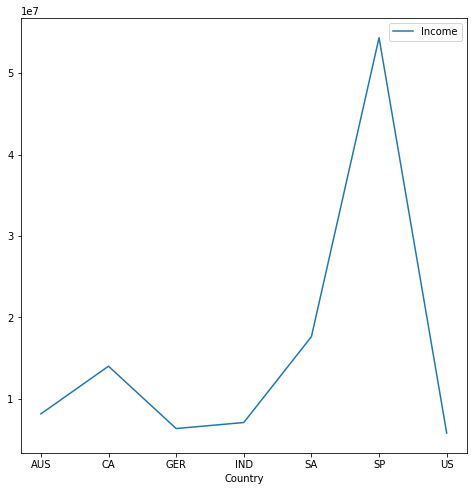

In [27]:
# plot the dataframe
country_summary_df.plot(x="Country", y=["Income"], kind="line", figsize=(8,8))
  
# print line graph
plt.show()

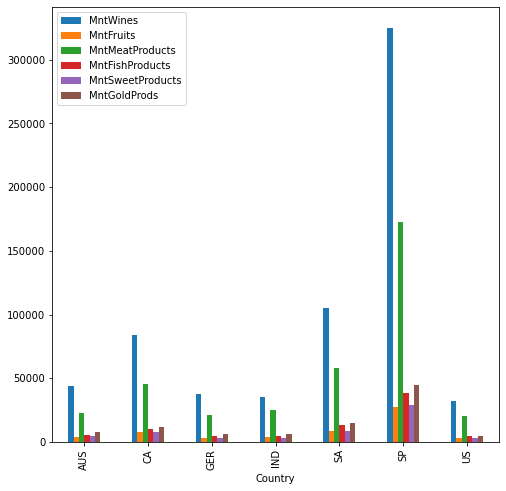

In [28]:
country_summary_df.plot(x='Country', y=['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'], kind="bar", figsize=(8,8))
# print bar graph
plt.show()

In [29]:
spain_df = marketClean_df.loc[(marketClean_df["Country"]=="SP")]
spain_df                             

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,mnt_sum,purchases_sum,Lat,Long,Per Capita Income,Currency Conv to USD
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,1190,15,40.416775,-3.70379,"27,057.2",0.846231
1,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,91,8,40.416775,-3.70379,"27,057.2",0.846231
2,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,1,0,SP,1192,17,40.416775,-3.70379,"27,057.2",0.846231
3,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,SP,96,7,40.416775,-3.70379,"27,057.2",0.846231
4,5642,1979,Master,Together,62499.0,1,0,2013-12-09,0,140,...,0,0,0,SP,222,12,40.416775,-3.70379,"27,057.2",0.846231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,7947,1969,Graduation,Married,42231.0,1,1,2014-03-25,99,24,...,0,0,0,SP,37,5,40.416775,-3.70379,"27,057.2",0.846231
1050,3363,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,0,0,0,SP,34,5,40.416775,-3.70379,"27,057.2",0.846231
1051,7232,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,...,0,0,0,SP,67,7,40.416775,-3.70379,"27,057.2",0.846231
1052,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,SP,55,5,40.416775,-3.70379,"27,057.2",0.846231


In [30]:
CA_df = marketClean_df.loc[(marketClean_df["Country"]=="CA")]
CA_df   

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,mnt_sum,purchases_sum,Lat,Long,Per Capita Income,Currency Conv to USD
1054,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,577,18,45.424721,-75.695,"43,241.6",1.263699
1055,2964,1981,Graduation,Married,26872.0,0,0,2013-10-16,0,3,...,0,0,0,CA,72,5,45.424721,-75.695,"43,241.6",1.263699
1056,1473,1960,2n Cycle,Single,47823.0,0,1,2013-07-23,0,53,...,0,0,0,CA,72,7,45.424721,-75.695,"43,241.6",1.263699
1057,2795,1958,Master,Single,30523.0,2,1,2013-07-01,0,5,...,0,0,0,CA,13,4,45.424721,-75.695,"43,241.6",1.263699
1058,9687,1975,Graduation,Single,73170.0,0,0,2014-05-31,1,184,...,0,0,0,CA,726,16,45.424721,-75.695,"43,241.6",1.263699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9499,1954,Graduation,Married,93404.0,1,2,2013-05-07,97,1279,...,0,0,0,CA,1616,17,45.424721,-75.695,"43,241.6",1.263699
1313,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,0,0,0,CA,767,23,45.424721,-75.695,"43,241.6",1.263699
1314,9706,1974,PhD,Single,31560.0,1,0,2013-06-24,98,62,...,0,0,0,CA,94,8,45.424721,-75.695,"43,241.6",1.263699
1315,5687,1980,Graduation,Divorced,81702.0,0,0,2012-09-23,98,563,...,0,0,0,CA,1633,27,45.424721,-75.695,"43,241.6",1.263699


In [31]:
Ind_df = marketClean_df.loc[(marketClean_df["Country"]=="CA")]
CA_df  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,mnt_sum,purchases_sum,Lat,Long,Per Capita Income,Currency Conv to USD
1054,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,577,18,45.424721,-75.695,"43,241.6",1.263699
1055,2964,1981,Graduation,Married,26872.0,0,0,2013-10-16,0,3,...,0,0,0,CA,72,5,45.424721,-75.695,"43,241.6",1.263699
1056,1473,1960,2n Cycle,Single,47823.0,0,1,2013-07-23,0,53,...,0,0,0,CA,72,7,45.424721,-75.695,"43,241.6",1.263699
1057,2795,1958,Master,Single,30523.0,2,1,2013-07-01,0,5,...,0,0,0,CA,13,4,45.424721,-75.695,"43,241.6",1.263699
1058,9687,1975,Graduation,Single,73170.0,0,0,2014-05-31,1,184,...,0,0,0,CA,726,16,45.424721,-75.695,"43,241.6",1.263699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9499,1954,Graduation,Married,93404.0,1,2,2013-05-07,97,1279,...,0,0,0,CA,1616,17,45.424721,-75.695,"43,241.6",1.263699
1313,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,0,0,0,CA,767,23,45.424721,-75.695,"43,241.6",1.263699
1314,9706,1974,PhD,Single,31560.0,1,0,2013-06-24,98,62,...,0,0,0,CA,94,8,45.424721,-75.695,"43,241.6",1.263699
1315,5687,1980,Graduation,Divorced,81702.0,0,0,2012-09-23,98,563,...,0,0,0,CA,1633,27,45.424721,-75.695,"43,241.6",1.263699


In [32]:
marketClean_df.Country.value_counts()

SP     1054
SA      333
CA      263
AUS     158
IND     145
GER     120
US      109
Name: Country, dtype: int64

In [35]:
marketClean_df["Total_Dependents"]= marketClean_df["Kidhome"] + marketClean_df["Teenhome"]
marketClean_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,mnt_sum,purchases_sum,Lat,Long,Per Capita Income,Currency Conv to USD,Total_Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,SP,1190,15,40.416775,-3.70379,"27,057.2",0.846231,0
1,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,SP,91,8,40.416775,-3.70379,"27,057.2",0.846231,1
2,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,1,0,SP,1192,17,40.416775,-3.70379,"27,057.2",0.846231,0
3,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,SP,96,7,40.416775,-3.70379,"27,057.2",0.846231,1
4,5642,1979,Master,Together,62499.0,1,0,2013-12-09,0,140,...,0,0,SP,222,12,40.416775,-3.70379,"27,057.2",0.846231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,9940,1958,Graduation,Together,64961.0,0,1,2012-12-23,97,382,...,0,0,SA,1009,16,-25.731340,28.21837,"5,090.7",14.717459,1
2178,3406,1964,Graduation,Single,45989.0,0,1,2012-10-22,97,138,...,0,0,SA,322,16,-25.731340,28.21837,"5,090.7",14.717459,1
2179,313,1968,Graduation,Widow,73455.0,0,0,2013-10-28,98,901,...,0,0,SA,2088,22,-25.731340,28.21837,"5,090.7",14.717459,0
2180,5871,1979,Master,Together,24401.0,0,0,2012-08-31,98,73,...,0,0,SA,467,16,-25.731340,28.21837,"5,090.7",14.717459,0


In [37]:
marketClean_df["Total_campaigns"]= marketClean_df["AcceptedCmp1"] + marketClean_df["AcceptedCmp2"]+marketClean_df["AcceptedCmp3"] + marketClean_df["AcceptedCmp4"] + marketClean_df["AcceptedCmp5"]
print(marketClean_df["Total_campaigns"])


0       0
1       1
2       0
3       0
4       0
       ..
2177    0
2178    0
2179    1
2180    0
2181    0
Name: Total_campaigns, Length: 2182, dtype: int64


In [39]:
marketClean_df["age"] = 2014 - marketClean_df["Year_Birth"]
print(marketClean_df["age"])

0       44
1       25
2       56
3       47
4       35
        ..
2177    56
2178    50
2179    46
2180    35
2181    48
Name: age, Length: 2182, dtype: int64


In [40]:
marketClean_df["Education"].unique()

array(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [48]:
def change_string(member):
    if member == "Basic":
        return 1
    elif member == "Graduation":
        return 2
    elif member == "2n Cycle":
        return 3
    elif member == "Master":
        return 4
    else :
        return 5


marketClean_df['edu_classes'] =  marketClean_df['Education'].apply(change_string)   

marketClean_df['edu_classes']  
marketClean_df[['Education','edu_classes']]    

,Education,edu_classes
0,Graduation,2
1,Graduation,2
2,PhD,5
3,Graduation,2
4,Master,4
...,...,...
2177,Graduation,2
2178,Graduation,2
2179,Graduation,2
2180,Master,4


In [51]:
marketClean_df["Marital_Status"].unique()

array(['Divorced', 'Single', 'Together', 'Married', 'Widow'], dtype=object)

In [53]:
def change_status(status):
    if status == "Single":
        return 1
    elif status == "Together":
        return 2
    elif status == "Married":
        return 3
    elif status == "Divorced":
        return 4
    else :
        return 5
    
marketClean_df['relation_status'] =  marketClean_df['Marital_Status'].apply(change_status)   
marketClean_df[['relation_status','Marital_Status']]   

,relation_status,Marital_Status
0,4,Divorced
1,1,Single
2,1,Single
3,2,Together
4,2,Together
...,...,...
2177,2,Together
2178,1,Single
2179,5,Widow
2180,2,Together


In [54]:
marketClean_df.to_csv("Resources\market_complete.csv",index = False)

In [33]:
# # create a variable to hold the RDS instance address
# rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# # make a connection string for the engine to connect to the database
# # "postgresql://[user]:[password]@[location]:[port]/[database]"
# db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# # Create the database engine
# engine = create_engine(db_string)
# # save the clean DataFrame to a SQL table
# market_df.to_sql(name='marketing_data', con=engine, if_exists='replace')